<a href="https://colab.research.google.com/github/NadeemMohsinDS/Aerospace/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.keggle
!cp kaggle.json ~/.keggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:50<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.7MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('./dogs-vs-cats.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential

In [7]:
train_data=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),

)

Found 20000 files belonging to 2 classes.


In [8]:
test_data=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),

)

Found 5000 files belonging to 2 classes.


In [9]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_data=train_data.map(process)
test_data=test_data.map(process)

In [21]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [23]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.9776 - loss: 0.0628 - val_accuracy: 0.7806 - val_loss: 0.8961
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 105ms/step - accuracy: 0.9848 - loss: 0.0491 - val_accuracy: 0.7782 - val_loss: 1.0934
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.9859 - loss: 0.0421 - val_accuracy: 0.7948 - val_loss: 1.2032
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - accuracy: 0.9866 - loss: 0.0437 - val_accuracy: 0.7990 - val_loss: 0.8554
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 85ms/step - accuracy: 0.9887 - loss: 0.0359 - val_accuracy: 0.7978 - val_loss: 0.8006
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.9904 - loss: 0.0329 - val_accuracy: 0.8034 - val_loss: 1.0763
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9910 - loss: 0.0323 - val_accuracy: 0.8234 - val_loss: 0.8832
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9915 - loss: 0.0263 -

In [16]:
import matplotlib.pyplot as plt

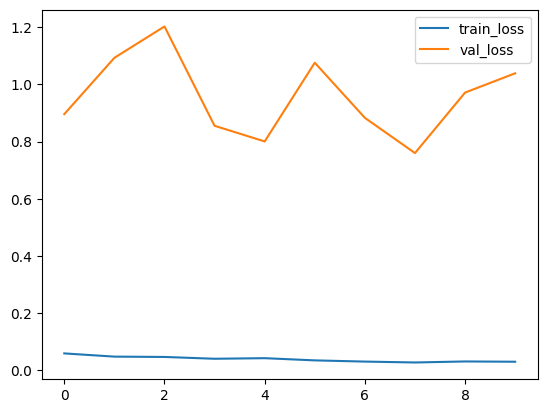

In [26]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

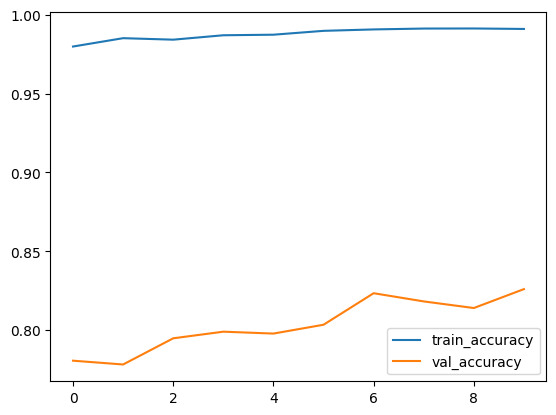

In [27]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting

#more data
#data augmentation
#L1/L2 regularization
#Dropout
#batch normalization
#compexity reduction


Simple Model

In [28]:
model1=Sequential()
model1.add(Conv2D(8,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Flatten())

model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(32,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(16,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history1=model1.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.6038 - loss: 0.7686 - val_accuracy: 0.7266 - val_loss: 0.5580
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7200 - loss: 0.5421 - val_accuracy: 0.7636 - val_loss: 0.4910
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.7853 - loss: 0.4578 - val_accuracy: 0.7994 - val_loss: 0.4395
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 69ms/step - accuracy: 0.8301 - loss: 0.3834 - val_accuracy: 0.8066 - val_loss: 0.4322
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.8612 - loss: 0.3222 - val_accuracy: 0.7838 - val_loss: 0.4825
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.8956 - loss: 0.2525 - val_accuracy: 0.8032 - val_loss: 0.6018
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 67ms/step - accuracy: 0.9233 - loss: 0.1934 - val_accuracy: 0.8238 - val_loss: 0.5147
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.9478 - loss: 0.1347 - 